# Importing Necessary Library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os

# Preparing Dataset

In [3]:
train_aug = 'D:/Kuliah/Semester 4/IGNITE/Rice_Leaf_AUG/Rice_Leaf_AUG'

In [4]:
print(f'The No of Sub-directories {len(os.listdir(train_aug))} ')
print()
images = 0
for dir in os.listdir(train_aug):
    subdir_path = os.path.join(train_aug, dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The No of Images inside the Sub-directory {dir}: {num_files}')
        images += num_files 
print()
print(f'Totol No of Images {images}')

The No of Sub-directories 9 

The No of Images inside the Sub-directory Bacterial Leaf Blight: 1197
The No of Images inside the Sub-directory Brown Spot: 1546
The No of Images inside the Sub-directory Healthy Rice Leaf: 1085
The No of Images inside the Sub-directory Leaf Blast: 1748
The No of Images inside the Sub-directory Leaf scald: 1332
The No of Images inside the Sub-directory Narrow Brown Leaf Spot: 954
The No of Images inside the Sub-directory Neck_Blast: 1000
The No of Images inside the Sub-directory Rice Hispa: 1299
The No of Images inside the Sub-directory Sheath Blight: 1629

Totol No of Images 11790


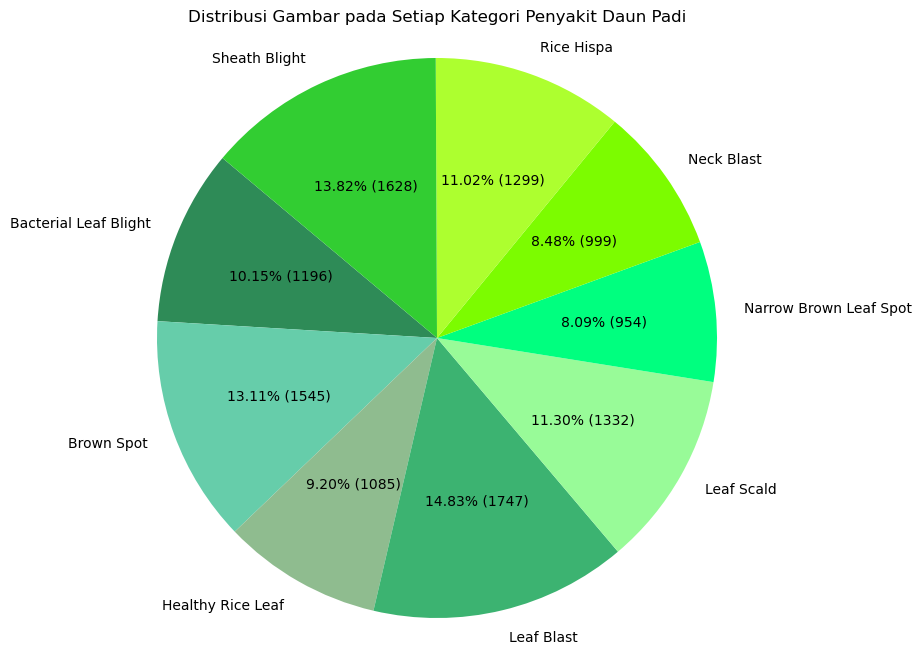

In [2]:
import matplotlib.pyplot as plt

# Data
labels = [
    'Bacterial Leaf Blight', 
    'Brown Spot', 
    'Healthy Rice Leaf', 
    'Leaf Blast', 
    'Leaf Scald', 
    'Narrow Brown Leaf Spot', 
    'Neck Blast', 
    'Rice Hispa', 
    'Sheath Blight'
]
sizes = [1197, 1546, 1085, 1748, 1332, 954, 1000, 1299, 1629]
total_images = 11790

# Colors (shades of green)
colors = [
    '#2E8B57', '#66CDAA', '#8FBC8F', '#3CB371', 
    '#98FB98', '#00FF7F', '#7CFC00', '#ADFF2F', '#32CD32'
]

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjusting the figure size
ax.pie(sizes, labels=labels, colors=colors, autopct=lambda p: f'{p:.2f}% ({int(p * total_images / 100)})', startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Distribusi Gambar pada Setiap Kategori Penyakit Daun Padi')

# Show plot
plt.show()


In [5]:
print(f'The No of Sub-directories {len(os.listdir(train_aug))} ')
print()
images_train_aug = 0
for dir in os.listdir(train_aug):
    subdir_path = os.path.join(train_aug, dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The No of Images percentage inside the Sub-directory {dir}: {(num_files / images) * 100 }')
        images_train_aug += num_files 
print()
print(f'Totol No of Images {images_train_aug}')

The No of Sub-directories 9 

The No of Images percentage inside the Sub-directory Bacterial Leaf Blight: 10.15267175572519
The No of Images percentage inside the Sub-directory Brown Spot: 13.112807463952503
The No of Images percentage inside the Sub-directory Healthy Rice Leaf: 9.202714164546226
The No of Images percentage inside the Sub-directory Leaf Blast: 14.826123833757421
The No of Images percentage inside the Sub-directory Leaf scald: 11.297709923664122
The No of Images percentage inside the Sub-directory Narrow Brown Leaf Spot: 8.091603053435115
The No of Images percentage inside the Sub-directory Neck_Blast: 8.481764206955047
The No of Images percentage inside the Sub-directory Rice Hispa: 11.017811704834605
The No of Images percentage inside the Sub-directory Sheath Blight: 13.816793893129772

Totol No of Images 11790


The No of Sub-directories 9 

The No of Images percentage inside the Sub-directory Bacterial Leaf Blight: 10.15267175572519
The No of Images percentage inside the Sub-directory Brown Spot: 13.112807463952503
The No of Images percentage inside the Sub-directory Healthy Rice Leaf: 9.202714164546226
The No of Images percentage inside the Sub-directory Leaf Blast: 14.826123833757421
The No of Images percentage inside the Sub-directory Leaf scald: 11.297709923664122
The No of Images percentage inside the Sub-directory Narrow Brown Leaf Spot: 8.091603053435115
The No of Images percentage inside the Sub-directory Neck_Blast: 8.481764206955047
The No of Images percentage inside the Sub-directory Rice Hispa: 11.017811704834605
The No of Images percentage inside the Sub-directory Sheath Blight: 13.816793893129772

Total No of Images 11790



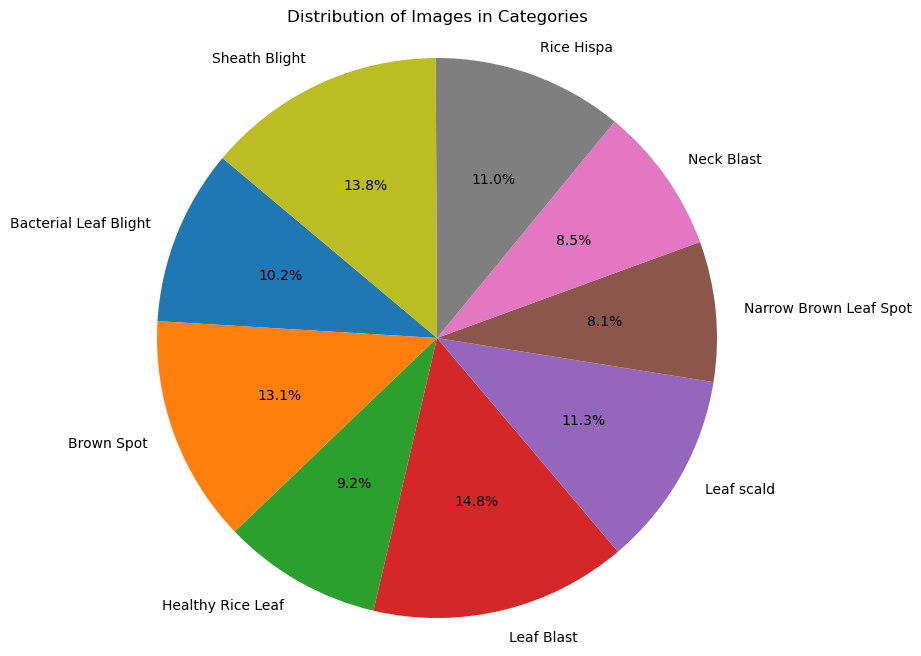

In [6]:
print(f'The No of Sub-directories {len(os.listdir(train_aug))} ')
print()

images = 0
categories = []
percentages = []

for dir in os.listdir(train_aug):
    subdir_path = os.path.join(train_aug, dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        category_name = dir.replace('_', ' ')  # Optional: Replace underscores with spaces for better display
        categories.append(category_name)
        percentages.append((num_files / 11790) * 100)
        print(f'The No of Images percentage inside the Sub-directory {dir}: {(num_files / images_train_aug) * 100 }')
        images += num_files 

print()
print(f'Total No of Images {images}')

# Plotting the data
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Images in Categories')
print()
plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [8]:
Image_Size= 224
Batch_Size = 32
Channels=3
Epochs=50

In [9]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "D:/Kuliah/Semester 4/IGNITE/Split/train",
    shuffle=True,
    image_size = (Image_Size,Image_Size),
    batch_size=Batch_Size
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "D:/Kuliah/Semester 4/IGNITE/Split/test",
    shuffle=True,
    image_size = (Image_Size,Image_Size),
    batch_size=Batch_Size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "D:/Kuliah/Semester 4/IGNITE/Split/val",
    shuffle=True,
    image_size = (Image_Size,Image_Size),
    batch_size=Batch_Size
)

Found 8249 files belonging to 9 classes.
Found 1187 files belonging to 9 classes.
Found 2354 files belonging to 9 classes.


# Modelling

In [10]:
class_names = train_data.class_names
class_names

['Bacterial Leaf Blight',
 'Brown Spot',
 'Healthy Rice Leaf',
 'Leaf Blast',
 'Leaf scald',
 'Narrow Brown Leaf Spot',
 'Neck_Blast',
 'Rice Hispa',
 'Sheath Blight']

In [11]:
n_classes = len(class_names)
n_classes

9

In [12]:
for image_batch, label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 224, 224, 3)
[6 7 6 4 2 1 7 4 2 1 8 1 1 6 5 0 6 7 8 8 6 7 1 3 4 4 5 6 0 3 5 2]


**trying out for the first image**

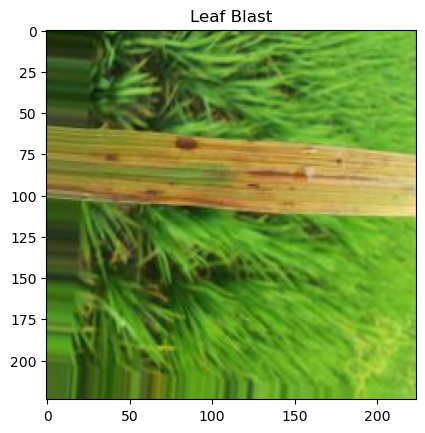

In [13]:
for image_batch, label_batch in train_data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])


In [14]:
acc = []
model_list = []

#### model_vgg19

In [12]:
from tensorflow.keras.applications import VGG19

input_shape = (Image_Size, Image_Size, Channels)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

model_vgg19 = models.Sequential([
    base_model,
    layers.GlobalMaxPooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model_vgg19.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [ ]:
history_vgg19 = model_vgg19.fit(train_data, validation_data=val_data, epochs=20)

In [18]:
train_score = model_vgg19.evaluate(train_data)
valid_score = model_vgg19.evaluate(val_data)
test_score = model_vgg19.evaluate(test_data)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

14/14 [==============================] - 2s 152ms/step - loss: nan - accuracy: 0.2333
Train Loss:  nan
Train Accuracy:  0.2450016885995865
------------------------------
Validation Loss:  nan
Validation Accuracy:  0.25741398334503174
------------------------------
Test Loss:  nan
Test Accuracy:  0.23333333432674408


In [19]:
acc.append(test_score[1])
model_list.append("VGG19")
print(acc, model_list)

[0.23333333432674408] ['VGG19']


### model_resnet50

In [15]:
from tensorflow.keras.applications import ResNet50

input_shape = (Image_Size, Image_Size, Channels)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

model_resnet50 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model_resnet50.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 190s 2us/step


In [16]:
# Asumsikan Image_Size dan Channels sudah didefinisikan
Image_Size = 224
Channels = 3

# Pastikan train_data sudah didefinisikan seperti sebelumnya
for image_batch, label_batch in train_data.take(1):
    model_resnet50(image_batch)

# Sekarang panggil model summary
model_resnet50.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (32, 7, 7, 2048)       │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 100352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 256)              │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 9)                │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,280,393 (187.99 MB)

 Trainable params: 49,227,273 (187.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [17]:
history_model_resnet50 = model_resnet50.fit(train_data, validation_data=val_data, epochs=5)

Epoch 1/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1642s 6s/step - accuracy: 0.4148 - loss: 4.1912 - val_accuracy: 0.5671 - val_loss: 1.5004
Epoch 2/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1599s 6s/step - accuracy: 0.7050 - loss: 0.8986 - val_accuracy: 0.5183 - val_loss: 1.8832
Epoch 3/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1582s 6s/step - accuracy: 0.7947 - loss: 0.6352 - val_accuracy: 0.5760 - val_loss: 1.6295
Epoch 4/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1662s 6s/step - accuracy: 0.8362 - loss: 0.5586 - val_accuracy: 0.7120 - val_loss: 1.0583
Epoch 5/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1788s 7s/step - accuracy: 0.8987 - loss: 0.3476 - val_accuracy: 0.1912 - val_loss: 78.9755


In [18]:
train_score = model_resnet50.evaluate(train_data)
valid_score = model_resnet50.evaluate(val_data)
test_score = model_resnet50.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

258/258 ━━━━━━━━━━━━━━━━━━━━ 384s 1s/step - accuracy: 0.1896 - loss: 79.7482
74/74 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.1974 - loss: 80.3119
38/38 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.1692 - loss: 89.8490
Train Loss:  79.95201873779297
Train Accuracy:  0.1888713836669922
------------------------------
Validation Loss:  78.97547149658203
Validation Accuracy:  0.19116397202014923
------------------------------
Test Loss:  83.4602279663086
Test Accuracy:  0.177759051322937


: 

In [16]:
print(acc, model_list)

[] []


In [17]:
acc.append(test_score[1])
model_list.append("ResNet50")
print(acc, model_list)

[0.579812228679657] ['ResNet50']


In [77]:
# Menyimpan model ke file HDF5
model_resnet50.save('model_resnet50.h5')

In [18]:
Image_Size

224

### model_efficientnetb0

In [15]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# Define input shape and number of classes
input_shape = (Image_Size, Image_Size, Channels)
n_classes = 9  # Update the number of classes to 9 as per your second model

# Load EfficientNetB0 model
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Create the new model
model_efficientnetb0 = models.Sequential()

# Add EfficientNetB0 base model
model_efficientnetb0.add(efficientnet_base)

# Add new layers as specified in the second example
model_efficientnetb0.add(layers.BatchNormalization())
model_efficientnetb0.add(layers.Flatten())
model_efficientnetb0.add(layers.Dense(256, activation='relu'))
model_efficientnetb0.add(layers.BatchNormalization())
model_efficientnetb0.add(layers.Dense(n_classes, activation='softmax'))

# Display model summary
model_efficientnetb0.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [16]:
# Asumsikan Image_Size dan Channels sudah didefinisikan
Image_Size = 224
Channels = 3

# Pastikan train_data sudah didefinisikan seperti sebelumnya
for image_batch, label_batch in train_data.take(1):
    model_efficientnetb0(image_batch)

# Sekarang panggil model summary
model_efficientnetb0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (32, 7, 7, 1280)       │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (32, 7, 7, 1280)       │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 62720)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 256)              │    16,056,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (32, 256)              │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 9)                │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,114,604 (76.73 MB)

 Trainable params: 20,069,509 (76.56 MB)

 Non-trainable params: 45,095 (176.16 KB)

In [17]:
model_efficientnetb0.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [18]:
history_model_efficientnetb0 = model_efficientnetb0.fit(train_data, validation_data=val_data, epochs=5) 

Epoch 1/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1054s 4s/step - accuracy: 0.6637 - loss: 1.2860 - val_accuracy: 0.8840 - val_loss: 0.3656
Epoch 2/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1009s 4s/step - accuracy: 0.9444 - loss: 0.1566 - val_accuracy: 0.9329 - val_loss: 0.2109
Epoch 3/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1107s 4s/step - accuracy: 0.9653 - loss: 0.1070 - val_accuracy: 0.9482 - val_loss: 0.1758
Epoch 4/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1280s 5s/step - accuracy: 0.9708 - loss: 0.0960 - val_accuracy: 0.9091 - val_loss: 0.3334
Epoch 5/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1026s 4s/step - accuracy: 0.9749 - loss: 0.0756 - val_accuracy: 0.9545 - val_loss: 0.1385


In [19]:
history_model_efficientnetb0.history

{'accuracy': [0.7922172546386719,
  0.9510243535041809,
  0.9676324129104614,
  0.965329110622406,
  0.9766032099723816],
 'loss': [0.69636070728302,
  0.15011467039585114,
  0.10117937624454498,
  0.1126880869269371,
  0.07285624742507935],
 'val_accuracy': [0.8840271830558777,
  0.9328802227973938,
  0.9481733441352844,
  0.9090909361839294,
  0.9545454382896423],
 'val_loss': [0.3656197786331177,
  0.21087372303009033,
  0.17579787969589233,
  0.3333717882633209,
  0.13845054805278778]}

In [20]:
train_score = model_efficientnetb0.evaluate(train_data)
valid_score = model_efficientnetb0.evaluate(val_data)
test_score = model_efficientnetb0.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

258/258 ━━━━━━━━━━━━━━━━━━━━ 164s 633ms/step - accuracy: 0.9826 - loss: 0.0526
74/74 ━━━━━━━━━━━━━━━━━━━━ 46s 626ms/step - accuracy: 0.9545 - loss: 0.1432
38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 653ms/step - accuracy: 0.9661 - loss: 0.1093
Train Loss:  0.04867413640022278
Train Accuracy:  0.9842405319213867
------------------------------
Validation Loss:  0.13845060765743256
Validation Accuracy:  0.9545454382896423
------------------------------
Test Loss:  0.1332865059375763
Test Accuracy:  0.9654591679573059


: 

In [78]:
# Menyimpan model ke file HDF5
model_efficientnetb0.save('model_efficientnetb0.h5')

In [25]:
acc.append(test_score[1])
model_list.append("EfficientNetB0")
print(acc, model_list)

[0.579812228679657, 0.8943662047386169] ['ResNet50', 'EfficientNetB0']


### model_mobilenetv2

In [26]:
from tensorflow.keras.applications import MobileNetV2

input_shape = (Image_Size, Image_Size, Channels)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

model_mobilenetv2 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 15s 2us/step


In [27]:
# Asumsikan Image_Size dan Channels sudah didefinisikan
Image_Size = 224
Channels = 3

# Pastikan train_data sudah didefinisikan seperti sebelumnya
for image_batch, label_batch in train_data.take(1):
    model_mobilenetv2(image_batch)

# Sekarang panggil model summary
model_mobilenetv2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (32, 7, 7, 1280)       │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 62720)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 256)              │    16,056,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 4)                │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,315,588 (69.87 MB)

 Trainable params: 18,281,476 (69.74 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [28]:
model_mobilenetv2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [29]:
history_model_mobilenetv2 = model_mobilenetv2.fit(train_data, validation_data=val_data, epochs=5)

Epoch 1/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.6565 - loss: 4.2281 - val_accuracy: 0.2625 - val_loss: 25.2974
Epoch 2/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8322 - loss: 0.7017 - val_accuracy: 0.2816 - val_loss: 20.5198
Epoch 3/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8878 - loss: 0.3311 - val_accuracy: 0.4845 - val_loss: 6.6331
Epoch 4/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8908 - loss: 0.3471 - val_accuracy: 0.4272 - val_loss: 4.0673
Epoch 5/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9020 - loss: 0.3395 - val_accuracy: 0.3795 - val_loss: 5.2830


In [30]:
train_score = model_mobilenetv2.evaluate(train_data)
valid_score = model_mobilenetv2.evaluate(val_data)
test_score = model_mobilenetv2.evaluate(test_data)


print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


106/106 ━━━━━━━━━━━━━━━━━━━━ 26s 246ms/step - accuracy: 0.3829 - loss: 5.4230
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.3976 - loss: 5.1758
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - accuracy: 0.3663 - loss: 5.4607
Train Loss:  5.427120208740234
Train Accuracy:  0.37544482946395874
------------------------------
Validation Loss:  5.283045768737793
Validation Accuracy:  0.379474937915802
------------------------------
Test Loss:  5.244970321655273
Test Accuracy:  0.3685446083545685


In [79]:
# Menyimpan model ke file HDF5
model_mobilenetv2.save('model_mobilenetv2.h5')

In [31]:
acc.append(test_score[1])
model_list.append("MobileNetV2")
print(acc, model_list)

[0.579812228679657, 0.8943662047386169, 0.3685446083545685] ['ResNet50', 'EfficientNetB0', 'MobileNetV2']


**Predicting Labels for a Batch of Images**

### model_inceptionv3

In [33]:
from tensorflow.keras.applications import InceptionV3

input_shape = (Image_Size, Image_Size, Channels)
n_classes = 4

inceptionv3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

model_inceptionv3 = models.Sequential([
    inceptionv3_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 71s 1us/step


In [34]:
# Asumsikan Image_Size dan Channels sudah didefinisikan
Image_Size = 224
Channels = 3

# Pastikan train_data sudah didefinisikan seperti sebelumnya
for image_batch, label_batch in train_data.take(1):
    model_inceptionv3(image_batch)

# Sekarang panggil model summary
model_inceptionv3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (32, 5, 5, 2048)       │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (32, 2048)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 256)              │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 4)                │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,328,356 (85.18 MB)

 Trainable params: 22,293,924 (85.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [35]:
model_inceptionv3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [36]:
history_model_inceptionv3 = model_inceptionv3.fit(train_data, validation_data=val_data, epochs=5)

Epoch 1/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.7345 - loss: 0.7136 - val_accuracy: 0.6110 - val_loss: 2.8041
Epoch 2/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 267s 3s/step - accuracy: 0.8944 - loss: 0.3208 - val_accuracy: 0.7852 - val_loss: 0.7010
Epoch 3/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.8959 - loss: 0.2728 - val_accuracy: 0.7208 - val_loss: 2.0826
Epoch 4/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.9270 - loss: 0.2089 - val_accuracy: 0.9093 - val_loss: 0.4611
Epoch 5/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.9413 - loss: 0.1712 - val_accuracy: 0.8807 - val_loss: 0.4308


In [37]:
train_score = model_inceptionv3.evaluate(train_data)
valid_score = model_inceptionv3.evaluate(val_data)
test_score = model_inceptionv3.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


106/106 ━━━━━━━━━━━━━━━━━━━━ 75s 707ms/step - accuracy: 0.9258 - loss: 0.2604
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 641ms/step - accuracy: 0.8687 - loss: 0.5041
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 646ms/step - accuracy: 0.8429 - loss: 0.6259
Train Loss:  0.24683184921741486
Train Accuracy:  0.9288256168365479
------------------------------
Validation Loss:  0.43079233169555664
Validation Accuracy:  0.8806682825088501
------------------------------
Test Loss:  0.5316446423530579
Test Accuracy:  0.8521126508712769


In [80]:
# Menyimpan model ke file HDF5
model_inceptionv3.save('model_inceptionv3.h5')

In [38]:
acc.append(test_score[1])
model_list.append("InceptionV3")
print(acc, model_list)

[0.579812228679657, 0.8943662047386169, 0.3685446083545685, 0.8521126508712769] ['ResNet50', 'EfficientNetB0', 'MobileNetV2', 'InceptionV3']


### model_densenet

In [39]:
from tensorflow.keras.applications import DenseNet121

input_shape = (Image_Size, Image_Size, Channels)
n_classes = 4

densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

model_densenet = models.Sequential([
    densenet_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 20s 1us/step


In [40]:
# Asumsikan Image_Size dan Channels sudah didefinisikan
Image_Size = 224
Channels = 3

# Pastikan train_data sudah didefinisikan seperti sebelumnya
for image_batch, label_batch in train_data.take(1):
    model_densenet(image_batch)

# Sekarang panggil model summary
model_densenet.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (32, 7, 7, 1024)       │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (32, 50176)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (32, 256)              │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 4)                │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,883,844 (75.85 MB)

 Trainable params: 19,800,196 (75.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [41]:
model_densenet.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [42]:
history_model_densenet = model_densenet.fit(train_data, validation_data=val_data, epochs=5)

Epoch 1/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 532s 5s/step - accuracy: 0.6220 - loss: 7.0283 - val_accuracy: 0.2601 - val_loss: 33525.7773
Epoch 2/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 482s 5s/step - accuracy: 0.8230 - loss: 0.4676 - val_accuracy: 0.5298 - val_loss: 3.5471
Epoch 3/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 483s 5s/step - accuracy: 0.7992 - loss: 0.8582 - val_accuracy: 0.8329 - val_loss: 0.4026
Epoch 4/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 503s 5s/step - accuracy: 0.8611 - loss: 0.3639 - val_accuracy: 0.8735 - val_loss: 0.3412
Epoch 5/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 509s 5s/step - accuracy: 0.8803 - loss: 0.3127 - val_accuracy: 0.8520 - val_loss: 0.4488


In [43]:
train_score = model_densenet.evaluate(train_data)
valid_score = model_densenet.evaluate(val_data)
test_score = model_densenet.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

106/106 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.8607 - loss: 0.4006
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8501 - loss: 0.4596
14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8380 - loss: 0.4425
Train Loss:  0.3763871490955353
Train Accuracy:  0.8689205050468445
------------------------------
Validation Loss:  0.4487532377243042
Validation Accuracy:  0.8520286679267883
------------------------------
Test Loss:  0.39928489923477173
Test Accuracy:  0.8497652411460876


In [44]:
# Menyimpan model ke file HDF5
model_densenet.save('densenet121_model.h5')

In [45]:
acc.append(test_score[1])
model_list.append("DenseNet121")
print(acc, model_list)

[0.579812228679657, 0.8943662047386169, 0.3685446083545685, 0.8521126508712769, 0.8497652411460876] ['ResNet50', 'EfficientNetB0', 'MobileNetV2', 'InceptionV3', 'DenseNet121']


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [47]:
gen_testing = datagen.flow_from_directory(
    "D:/SEMESTER 4/DATA SAINS/project/dataset/test",
    target_size=(224, 224),
    batch_size=20
)

Found 426 images belonging to 4 classes.


In [48]:
from PIL import Image
y_actual_path = gen_testing.filepaths
y_actual = gen_testing.labels
from sklearn.metrics import accuracy_score

In [49]:
acc_test = []

In [50]:
model_name_list = [model_resnet50,model_efficientnetb0,model_mobilenetv2,model_inceptionv3,model_densenet]

In [51]:
y_actual_path

['D:/SEMESTER 4/DATA SAINS/project/dataset/test\\cataract\\1102_right.jpg',
 'D:/SEMESTER 4/DATA SAINS/project/dataset/test\\cataract\\2101_right.jpg',
 'D:/SEMESTER 4/DATA SAINS/project/dataset/test\\cataract\\2103_right.jpg',
 'D:/SEMESTER 4/DATA SAINS/project/dataset/test\\cataract\\2106_right.jpg',
 'D:/SEMESTER 4/DATA SAINS/project/dataset/test\\cataract\\2108_right.jpg',
 'D:/SEMESTER 4/DATA SAINS/project/dataset/test\\cataract\\2113_right.jpg',
 'D:/SEMESTER 4/DATA SAINS/project/dataset/test\\cataract\\2116_left.jpg',
 'D:/SEMESTER 4/DATA SAINS/project/dataset/test\\cataract\\2120_right.jpg',
 'D:/SEMESTER 4/DATA SAINS/project/dataset/test\\cataract\\2122_left.jpg',
 'D:/SEMESTER 4/DATA SAINS/project/dataset/test\\cataract\\2127_left.jpg',
 'D:/SEMESTER 4/DATA SAINS/project/dataset/test\\cataract\\2127_right.jpg',
 'D:/SEMESTER 4/DATA SAINS/project/dataset/test\\cataract\\2135_right.jpg',
 'D:/SEMESTER 4/DATA SAINS/project/dataset/test\\cataract\\2138_right.jpg',
 'D:/SEMESTER 4

In [52]:
image_path = "D:/SEMESTER 4/DATA SAINS/project/dataset/diabetic_retinopathy/122_left.jpeg"
image = Image.open(image_path)
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = model_efficientnetb0.predict(img_array)   # using best model
class_labels = class_names
score = tf.nn.softmax(predictions[0])
max_index = np.array(predictions).argmax()
target = class_labels[max_index]
print(max_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1


In [54]:
# Cetak hasil prediksi
print(f"Indeks Kelas Prediksi: {max_index}")
print(f"Label Kelas Prediksi: {target}")
print(f"Skor Prediksi: {score.numpy()}")

Indeks Kelas Prediksi: 3
Label Kelas Prediksi: normal
Skor Prediksi: [0.17511919 0.17511927 0.17592812 0.47383338]


In [53]:
for md in model_name_list:
    y_pred = []
    for image_path in y_actual_path:
        image = Image.open(image_path)
        img = image.resize((224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        # Make predictions
        predictions = md.predict(img_array)
        class_labels = class_names
        score = tf.nn.softmax(predictions[0])
        max_index = np.array(predictions).argmax()
        target = class_labels[max_index]
        y_pred.append(max_index)
    acc_test.append(accuracy_score(y_actual,y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━

In [55]:
acc_test

[0.5305164319248826,
 0.8873239436619719,
 0.38028169014084506,
 0.8568075117370892,
 0.8497652582159625]

C:\Users\acer\AppData\Local\Temp\ipykernel_19492\2737341383.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc_test,y = model_list,palette='bright')


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

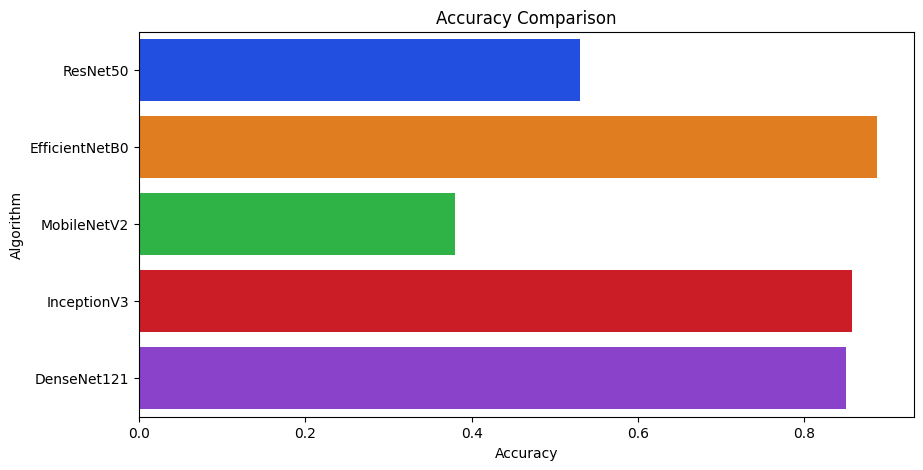

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc_test,y = model_list,palette='bright')

In [59]:
accuracy_models = dict(zip(model_list, acc_test))
for k, v in accuracy_models.items():
    print (k, '-->', v)
     

ResNet50 --> 0.5305164319248826
EfficientNetB0 --> 0.8873239436619719
MobileNetV2 --> 0.38028169014084506
InceptionV3 --> 0.8568075117370892
DenseNet121 --> 0.8497652582159625


In [63]:
!pip install pydot
!pip install graphviz



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from tensorflow.keras.utils import plot_model
plot_model(model_efficientnetb0, show_shapes=True, to_file='cnn_model.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [65]:
import pydot

In [67]:
from tensorflow.keras.utils import plot_model

# Pastikan model Anda sudah terdefinisi
# Misalkan model_efficientnetb0 adalah model yang ingin Anda visualisasikan

# Memvisualisasikan model dan menyimpan ke dalam file gambar
plot_model(model_efficientnetb0, show_shapes=True, to_file='cnn_model.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [68]:
import matplotlib.pyplot as plt

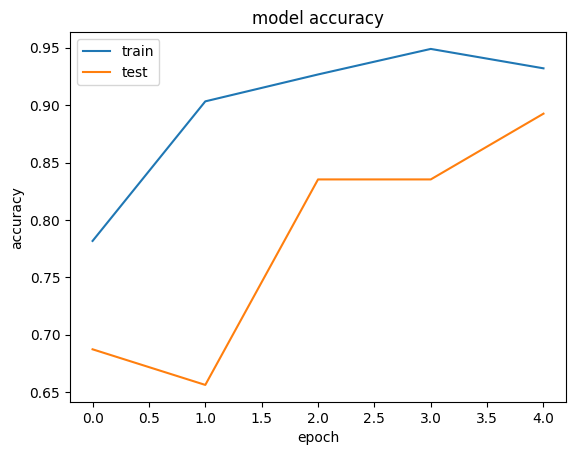

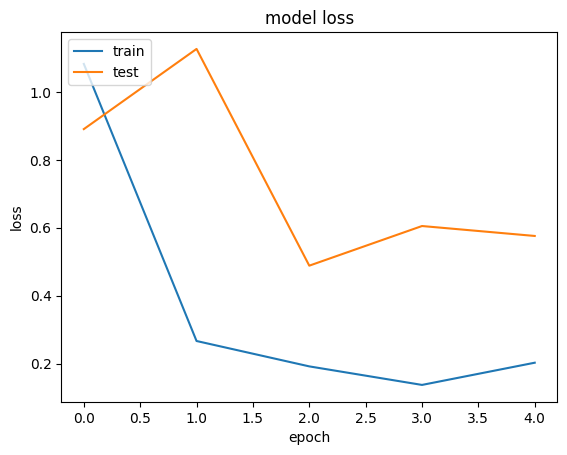

In [69]:
plt.plot(history_model_efficientnetb0.history['accuracy'])
plt.plot(history_model_efficientnetb0.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_model_efficientnetb0.history['loss'])
plt.plot(history_model_efficientnetb0.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
y_pred = []
for image_path in y_actual_path:
    image = Image.open(image_path)
    img = image.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Make predictions
    predictions = model_efficientnetb0.predict(img_array)
    class_labels = class_names
    score = tf.nn.softmax(predictions[0])
    max_index = np.array(predictions).argmax()
    target = class_labels[max_index]
    y_pred.append(max_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_pred,digits=4, target_names=class_names))

                      precision    recall  f1-score   support

            cataract     0.9035    0.9810    0.9406       105
diabetic_retinopathy     0.9250    1.0000    0.9610       111
            glaucoma     0.9221    0.6961    0.7933       102
              normal     0.8087    0.8611    0.8341       108

            accuracy                         0.8873       426
           macro avg     0.8898    0.8845    0.8823       426
        weighted avg     0.8895    0.8873    0.8837       426



In [72]:
from sklearn.metrics import confusion_matrix


result = confusion_matrix(y_actual, y_pred)

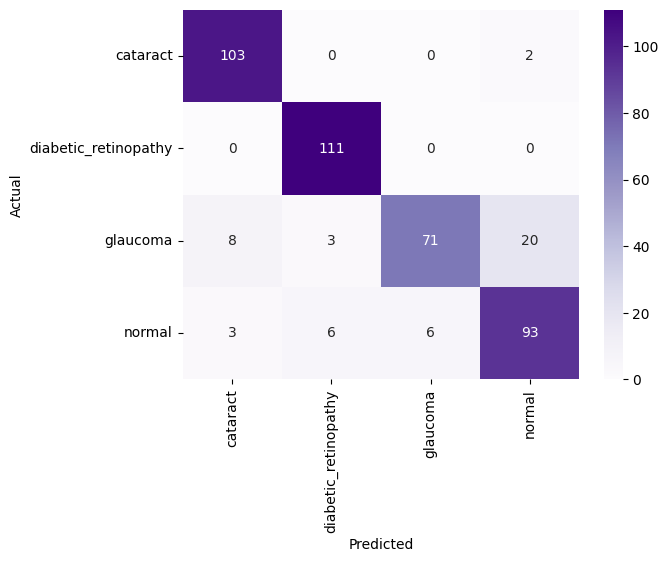

In [73]:
import pandas as pd
import seaborn as sns
label_names= class_names
df_cm = pd.DataFrame(result, columns=label_names, index=label_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Purples", annot=True, fmt='.0f'); # font size


In [81]:
model_efficientnetb0.save("model_eye.h5")

**Image Prediction Function Using the Model**

In [75]:
def pred(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [76]:
from tensorflow.keras.models import load_model

In [68]:
test_model = load_model('/kaggle/working/model_eye.h5')

# Show the model architecture
test_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_max_pooling2d_1 (Gl  (None, 1280)              0         
 obalMaxPooling2D)                                               
                                                                 
 dense_4 (Dense)             (None, 256)               327936    
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 4378535 (16.70 MB)
Trainable params: 4336512 (16.54 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________


In [69]:
train_score = test_model.evaluate(train_data)
valid_score = test_model.evaluate(val_data)
test_score = test_model.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

14/14 [==============================] - 1s 43ms/step - loss: 0.3997 - accuracy: 0.9071
Train Loss:  0.022228766232728958
Train Accuracy:  0.9932226538658142
------------------------------
Validation Loss:  0.32711201906204224
Validation Accuracy:  0.927639365196228
------------------------------
Test Loss:  0.39968380331993103
Test Accuracy:  0.9071428775787354


In [70]:
y_pred = []
for image_path in y_actual_path:
    image = Image.open(image_path)
    img = image.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Make predictions
    predictions = model_efficientnetb0.predict(img_array)
    class_labels = class_names
    score = tf.nn.softmax(predictions[0])
    max_index = np.array(predictions).argmax()
    
    #target = class_labels[max_index]
    y_pred.append(max_index)

1/1 [==============================] - 0s 29ms/step


In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_pred,y_actual, digits=4))

              precision    recall  f1-score   support

           0     0.9184    0.9000    0.9091       100
           1     1.0000    1.0000    1.0000       104
           2     0.8667    0.8750    0.8708       104
           3     0.8673    0.8750    0.8711       112

    accuracy                         0.9119       420
   macro avg     0.9131    0.9125    0.9128       420
weighted avg     0.9121    0.9119    0.9120       420

